In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# # Use the tuple() function to display the latitude and longitude combinations.
# for coordinate in coordinates:
#     print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
#           citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)
city_url = url 
print(city_url)
# Import the datetime module from the datetime library.
from datetime import datetime


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3917c8e40ad06b07551934e55efc7936
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3917c8e40ad06b07551934e55efc7936


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | maumere
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | viligili
City not found. Skipping...
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | paamiut
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | beringovskiy
Processing Record 10 of Set 1 | krasnogorskoye
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | pisco
Processing Record 13 of Set 1 | irtyshskiy
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 1 | tual
Processing Record 20 of Set 1 | norman wells
Processing Record 21 of Set 

Processing Record 37 of Set 4 | san andres
Processing Record 38 of Set 4 | morogoro
Processing Record 39 of Set 4 | hami
Processing Record 40 of Set 4 | saldanha
Processing Record 41 of Set 4 | zhezkazgan
Processing Record 42 of Set 4 | warqla
City not found. Skipping...
Processing Record 43 of Set 4 | saint-philippe
Processing Record 44 of Set 4 | broken hill
Processing Record 45 of Set 4 | sapao
City not found. Skipping...
Processing Record 46 of Set 4 | zakopane
Processing Record 47 of Set 4 | dingle
Processing Record 48 of Set 4 | lagoa
Processing Record 49 of Set 4 | puerto ayora
Processing Record 50 of Set 4 | mar del plata
Processing Record 1 of Set 5 | santa fe
Processing Record 2 of Set 5 | nioro
Processing Record 3 of Set 5 | markova
Processing Record 4 of Set 5 | neuquen
Processing Record 5 of Set 5 | santa marta
Processing Record 6 of Set 5 | yarada
Processing Record 7 of Set 5 | slonim
Processing Record 8 of Set 5 | castro
Processing Record 9 of Set 5 | porto novo
Processi

Processing Record 30 of Set 8 | kemlya
Processing Record 31 of Set 8 | russell
Processing Record 32 of Set 8 | tura
Processing Record 33 of Set 8 | vastervik
City not found. Skipping...
Processing Record 34 of Set 8 | karratha
Processing Record 35 of Set 8 | urusha
Processing Record 36 of Set 8 | bathsheba
Processing Record 37 of Set 8 | port hedland
Processing Record 38 of Set 8 | filingue
Processing Record 39 of Set 8 | tezu
Processing Record 40 of Set 8 | shubarshi
Processing Record 41 of Set 8 | luena
Processing Record 42 of Set 8 | polewali
Processing Record 43 of Set 8 | santomera
Processing Record 44 of Set 8 | malinovskiy
Processing Record 45 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 46 of Set 8 | magnolia
Processing Record 47 of Set 8 | harper
Processing Record 48 of Set 8 | mayahi
Processing Record 49 of Set 8 | nizhniy kuranakh
Processing Record 50 of Set 8 | arlit
Processing Record 1 of Set 9 | palabuhanratu
City not found. Skipping...
Processing R

Processing Record 17 of Set 12 | prabumulih
Processing Record 18 of Set 12 | hutchinson
Processing Record 19 of Set 12 | shaunavon
Processing Record 20 of Set 12 | isiro
Processing Record 21 of Set 12 | sogdiondon
City not found. Skipping...
Processing Record 22 of Set 12 | pitsunda
Processing Record 23 of Set 12 | mnogovershinnyy
Processing Record 24 of Set 12 | salalah
Processing Record 25 of Set 12 | litovko
Processing Record 26 of Set 12 | bubaque
Processing Record 27 of Set 12 | leeton
Processing Record 28 of Set 12 | palu
Processing Record 29 of Set 12 | carahue
Processing Record 30 of Set 12 | ilulissat
Processing Record 31 of Set 12 | aykhal
Processing Record 32 of Set 12 | marsabit
Processing Record 33 of Set 12 | mpika
Processing Record 34 of Set 12 | van buren
Processing Record 35 of Set 12 | lazaro cardenas
Processing Record 36 of Set 12 | krasnousolskiy
City not found. Skipping...
Processing Record 37 of Set 12 | bosaso
Processing Record 38 of Set 12 | phan rang
City not f

In [10]:
len(city_data)


565

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Maumere,-8.6199,122.2111,85.86,71,81,4.07,ID,2021-10-27 03:38:04
1,Hobart,-42.8794,147.3294,76.01,51,20,1.01,AU,2021-10-27 03:38:05
2,Ushuaia,-54.8000,-68.3000,40.66,60,20,6.91,AR,2021-10-27 03:38:05
3,Paamiut,61.9940,-49.6678,36.93,58,0,7.70,GL,2021-10-27 03:38:06
4,Punta Arenas,-53.1500,-70.9167,41.11,81,40,8.05,CL,2021-10-27 03:38:06
5,Busselton,-33.6500,115.3333,61.05,57,73,13.65,AU,2021-10-27 03:37:31
6,New Norfolk,-42.7826,147.0587,75.65,34,0,1.99,AU,2021-10-27 03:38:07
7,Beringovskiy,63.0500,179.3167,8.19,85,100,23.87,RU,2021-10-27 03:38:07
8,Krasnogorskoye,52.2953,86.1979,35.82,95,100,2.84,RU,2021-10-27 03:38:07
9,Port Alfred,-33.5906,26.8910,67.12,86,95,30.44,ZA,2021-10-27 03:36:38


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Maumere,ID,2021-10-27 03:38:04,-8.6199,122.2111,85.86,71,81,4.07
1,Hobart,AU,2021-10-27 03:38:05,-42.8794,147.3294,76.01,51,20,1.01
2,Ushuaia,AR,2021-10-27 03:38:05,-54.8000,-68.3000,40.66,60,20,6.91
3,Paamiut,GL,2021-10-27 03:38:06,61.9940,-49.6678,36.93,58,0,7.70
4,Punta Arenas,CL,2021-10-27 03:38:06,-53.1500,-70.9167,41.11,81,40,8.05
5,Busselton,AU,2021-10-27 03:37:31,-33.6500,115.3333,61.05,57,73,13.65
6,New Norfolk,AU,2021-10-27 03:38:07,-42.7826,147.0587,75.65,34,0,1.99
7,Beringovskiy,RU,2021-10-27 03:38:07,63.0500,179.3167,8.19,85,100,23.87
8,Krasnogorskoye,RU,2021-10-27 03:38:07,52.2953,86.1979,35.82,95,100,2.84
9,Port Alfred,ZA,2021-10-27 03:36:38,-33.5906,26.8910,67.12,86,95,30.44


In [13]:
# # Create the output file (CSV).
# output_data_file = "weather_data/cities.csv"
# # Export the City_Data into a CSV.
# city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1635306125.2459562

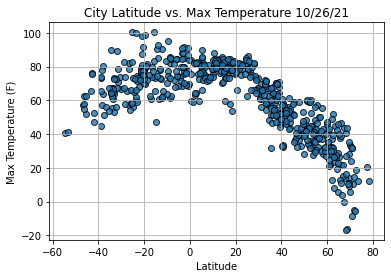

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
#plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

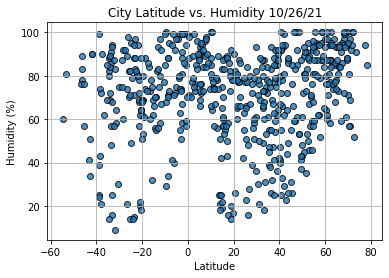

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
#plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

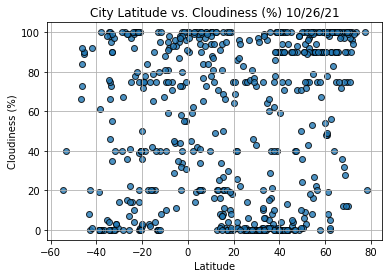

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
#plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

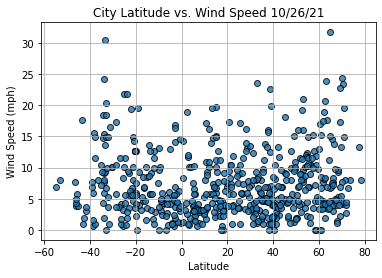

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
#plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                        Vaini
Country                        TO
Date          2021-10-27 03:38:09
Lat                         -21.2
Lng                        -175.2
Max Temp                    78.96
Humidity                       78
Cloudiness                     20
Wind Speed                  14.97
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4      False
       ...  
560    False
561     True
562     True
563     True
564     True
Name: Lat, Length: 565, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Paamiut,GL,2021-10-27 03:38:06,61.9940,-49.6678,36.93,58,0,7.70
7,Beringovskiy,RU,2021-10-27 03:38:07,63.0500,179.3167,8.19,85,100,23.87
8,Krasnogorskoye,RU,2021-10-27 03:38:07,52.2953,86.1979,35.82,95,100,2.84
11,Irtyshskiy,RU,2021-10-27 03:38:08,58.3333,68.1333,28.11,87,67,7.14
14,Kapaa,US,2021-10-27 03:38:10,22.0752,-159.3190,80.58,77,1,1.01
...,...,...,...,...,...,...,...,...,...
559,Sindor,RU,2021-10-27 03:42:02,62.8629,51.8905,26.24,94,100,8.37
561,Labuan,MY,2021-10-27 03:42:03,5.2767,115.2417,89.76,66,20,3.00
562,Iskitim,RU,2021-10-27 03:42:04,54.6366,83.3045,29.25,57,79,10.25
563,Stykkisholmur,IS,2021-10-27 03:42:04,65.0757,-22.7297,40.33,87,100,31.72


In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Paamiut,GL,2021-10-27 03:38:06,61.9940,-49.6678,36.93,58,0,7.70
7,Beringovskiy,RU,2021-10-27 03:38:07,63.0500,179.3167,8.19,85,100,23.87
8,Krasnogorskoye,RU,2021-10-27 03:38:07,52.2953,86.1979,35.82,95,100,2.84
11,Irtyshskiy,RU,2021-10-27 03:38:08,58.3333,68.1333,28.11,87,67,7.14
14,Kapaa,US,2021-10-27 03:38:10,22.0752,-159.3190,80.58,77,1,1.01


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

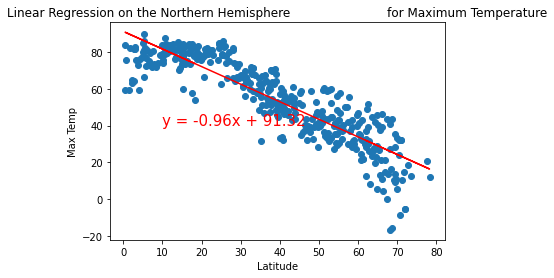

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

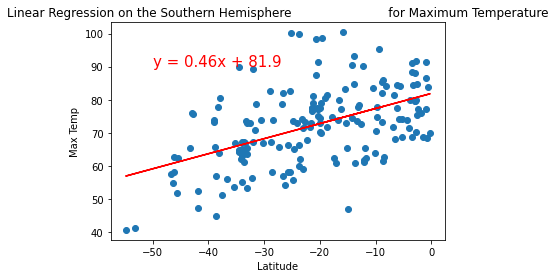

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

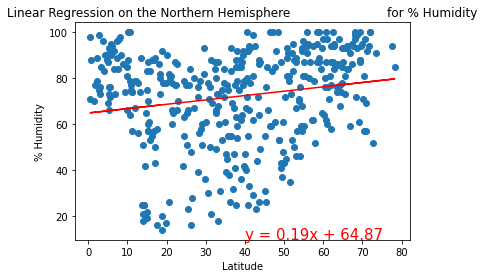

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

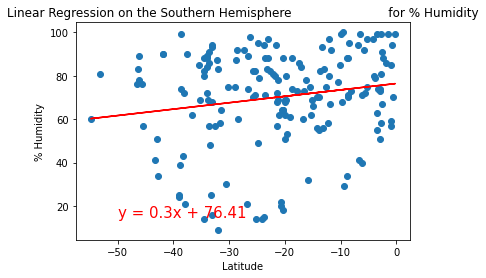

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

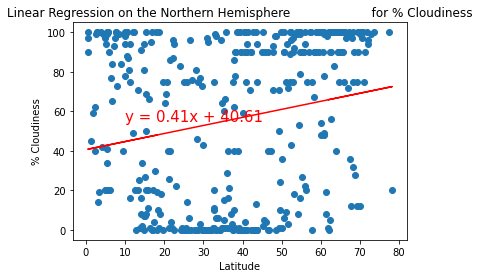

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

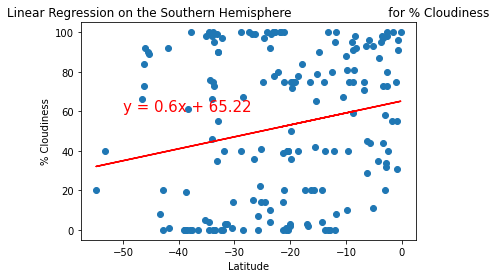

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

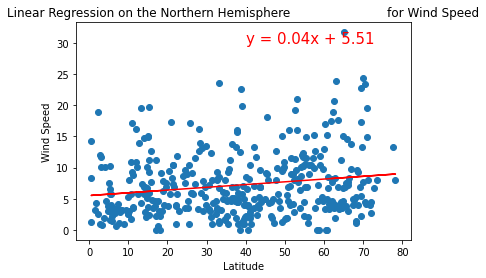

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,30))

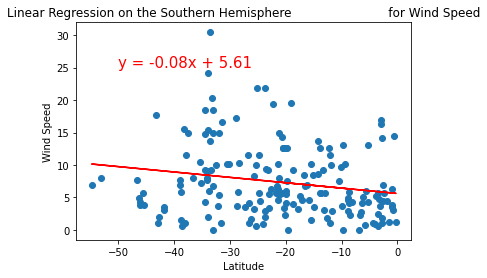

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))